Array Factor
====
Last update: 7 July 2018

In an antenna array (a set of multiple identical antennas which work together as a single antenna), the directivity of the entire array is the multiplicative sum of the individual antenna's directivity function with a mathematical expression known as the array factor {\displaystyle AF} {\displaystyle AF}, which typically depends on the location, the excitation and the phase of each antenna element.  


Array dimensions are in units of wavelength $\lambda$  

Code to display the array factor for planar phased array.  
https://github.com/zinka/arraytool  

review equations here:  
http://www.antenna-theory.com/arrays/weights/twoDuniform.php  

## plans
- ~~write code to follow some of the antenna theory web page equations, Antenna array basics.ipynb~~
- write code to generate 4pi phased array antenna patterns for T_ant calculations, CBITS array.ipynb
- need to get antenna pattern for a single patch

In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Lam = 1 # lambda (or wavelength) is 1

m = 14 # number of elements along x axis
n = 10 # number of elements along y axis
d = Lam/2 # spacing between points
x = np.ones(m*n) # array of element x positions
y = np.ones(m*n) # array of element y positions
print('number of elements = {:d}'.format(m*n))

number of elements = 140


In [3]:
# generate coordinate points for hexagonal pattern
for j in range(n):
    for i in range(m):
        if j%2:
            x[i+m*j] = i*d + d/2
        else:
            x[i+m*j] = i*d
        y[i+m*j] = j*d*np.sqrt(3)/2

In [55]:
# generate coordinate points for rectangular pattern
for j in range(n):
    for i in range(m):
        x[i+m*j] = i*d
        y[i+m*j] = j*d

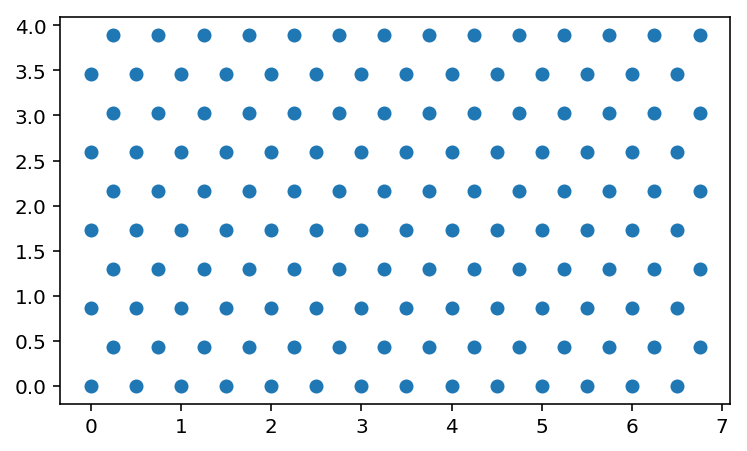

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.plot(x,y,'o')
plt.show()

In [5]:
# set the element weights
A = np.ones((n,m)) # Uniform planar excitation

In [6]:
# center the array in coordinate system
[x1, y1] = np.mgrid[0:m, 0:n]
x1 = (x - x[m-1]/2).T
y1 = (y - y[-1]/2).T

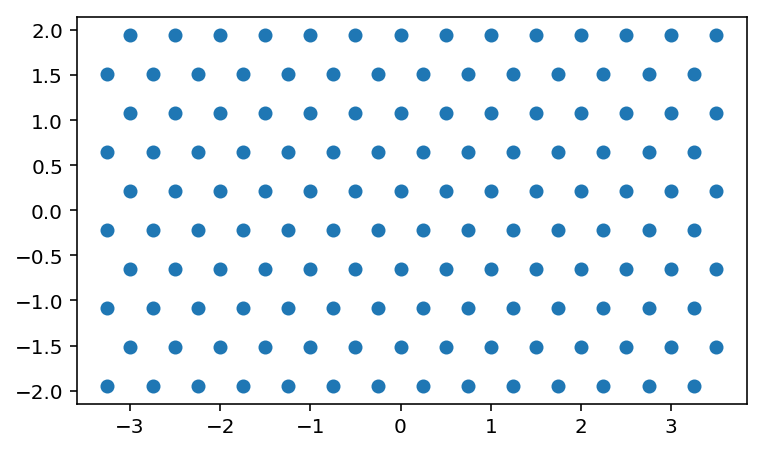

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.plot(x1,y1,'o')
plt.show()

# Calculate array factor
see Antennas, by Blake, pages 209 to 210

The wave number defined as the number of radians per unit distance, sometimes called the angular wavenumber.  

$k =\frac {2\pi }{\lambda }$  

The angle $\theta$ varies from 0 to 180 degrees and the angle $\phi$ varies from 0 to 360 degrees.  
Essentially, the angle $\phi$ remains in the xy-plane and “pulls” $\theta$ around the z-axis.  

Need to make sure that $\theta$ and $\phi$ run in the same order and limits when generating other data arrays.

In [8]:
k = 2*np.pi/Lam # wave number

In [40]:
# set scan angle
Td = 0*np.pi/180 # scan angle in theta direction
Pd = 0*np.pi/180 # scan angle in phi direction
Wnx = np.exp(1j*k*np.sin(Td)*np.cos(Pd)*x1)
Wny = np.exp(1j*k*np.sin(Td)*np.sin(Pd)*y1)

In [41]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
# convert deg to radians
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

AF = np.zeros((len(theta),len(phi)),dtype=complex)
for i in range(len(theta)):
    for j in range(len(phi)):
        s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi[j])))
        s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi[j])))
        AF[i,j] = s1*s2

In [42]:
# export data file
pickle.dump(AF, open( "AF.pkl", "wb" ))

# Plot array factor
$\theta$ is varied from -90 to 90 degrees and $\phi$ is varied from 0 to 360 degrees.  

In [43]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = -90
theta_max = 90
phi_min = 0
phi_max = 360
# convert deg to radians
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

AF = np.zeros((len(theta),len(phi)),dtype=complex)
for i in range(len(theta)):
    for j in range(len(phi)):
        s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi[j])))
        s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi[j])))
        AF[i,j] = s1*s2

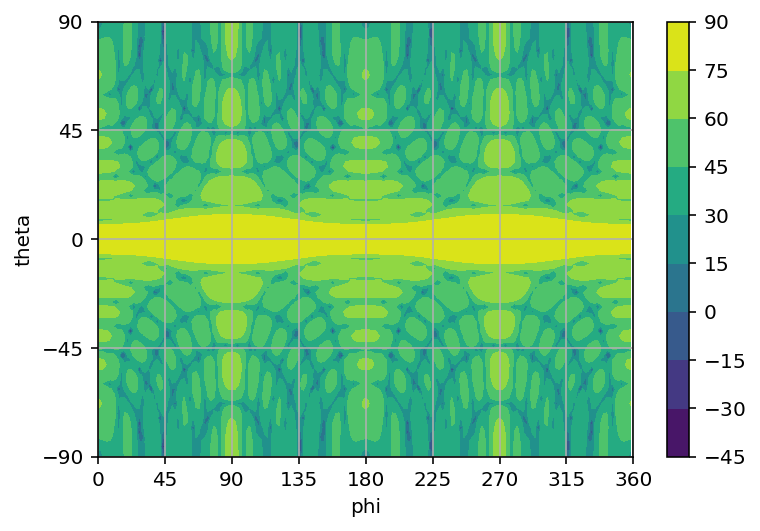

In [44]:
AF_plt = 20*np.log10(abs(AF)) # convert to dB magnitude for plotting
AF_plt  = np.clip(AF_plt,-40,np.inf) # set limits for plotted data

# re-build theta and phi in terms of deg
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,AF_plt,10)
ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

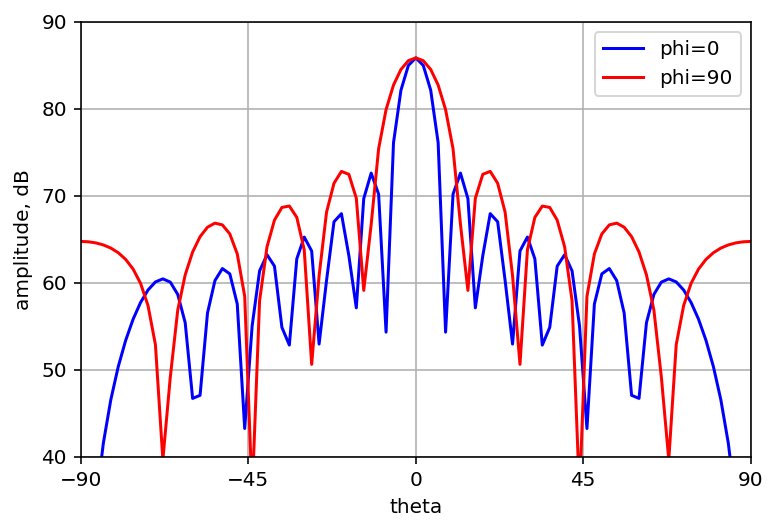

In [45]:
# plotting principle plane cuts
plt.plot(theta,20*np.log10(np.absolute(AF[:,0])),'b',label='phi=0')
plt.plot(theta,20*np.log10(np.absolute(AF[:,45])),'r',label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(40,90)
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=45))
plt.show()

In [0]:
# plot u and v,  <---- add later

# Polar plot
$\theta$ is varied from 0 to 360 degrees while leaving $\phi$ equal to 0 and 90 degrees.  

In [46]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = 0
theta_max = 360
phi = 0

# convert deg to radians
theta = np.arange(theta_min,theta_max,step)*np.pi/180

# phi = 0
AF_phi0 = np.zeros(len(theta),dtype=complex)
for i in range(len(theta)):
    s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi)))
    s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi)))
    AF_phi0[i] = s1*s2

# phi = 90
phi = 90*np.pi/180
AF_phi90 = np.zeros(len(theta),dtype=complex)
for i in range(len(theta)):
    s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi)))
    s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi)))
    AF_phi90[i] = s1*s2

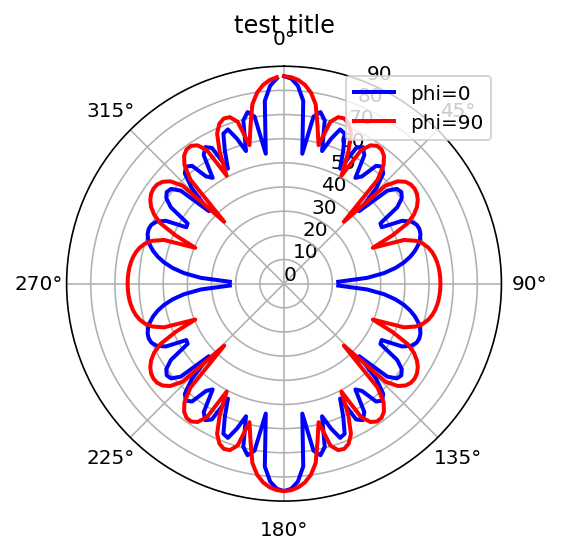

In [47]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = 0 #set plot grid
maxGrid = 100
gridSpacing = 10
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta,20*np.log10(np.absolute(AF_phi0)),'b',linewidth = 2,label='phi=0')
ax.plot(theta,20*np.log10(np.absolute(AF_phi90)),'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()

# end

In [114]:
AF.shape

(91, 180)

# code from Matlab site
https://www.mathworks.com/matlabcentral/fileexchange/49690-array-factor-beampattern-of-discrete-array-of-any-shape  

also see:  
https://www.mathworks.com/help/antenna/analysis.html  

# extracting essential lines of code from Arraytool function pattern_uv

In [10]:
#array_ip
u_scan = 15*3.14/180 # set to +15 for a test
v_scan = 15*3.14/18
u_min = -2
u_max = 2
u_num = 300
v_min = -2
v_max = 2
v_num = 300
#scale = "dB"
dB_limit = -40
#factor= "NF"
#plot_type = "contour"
#mayavi_app = False

In [31]:
# Finally, arranging all the data into 'Arraytool' input format
x = np.reshape(x1, (M * N, -1))
y = np.reshape(y1, (M * N, -1))
z = np.zeros_like(x) # because only planar arrays are permitted here
A = np.reshape(A, (M * N, -1))
array_ip = np.hstack((x, y, z, A))  # finally, 'Arraytool' input format

In [32]:
x.shape

(25, 1)

In [13]:
y.shape

(25, 1)

In [14]:
z.shape

(25, 1)

In [15]:
A.shape

(25, 1)

In [33]:
array_ip.shape

(25, 4)

In [17]:
x

array([[-2. ],
       [-1. ],
       [ 0. ],
       [ 1. ],
       [ 2. ],
       [-1.5],
       [-0.5],
       [ 0.5],
       [ 1.5],
       [ 2.5],
       [-2. ],
       [-1. ],
       [ 0. ],
       [ 1. ],
       [ 2. ],
       [-1.5],
       [-0.5],
       [ 0.5],
       [ 1.5],
       [ 2.5],
       [-2. ],
       [-1. ],
       [ 0. ],
       [ 1. ],
       [ 2. ]])

In [34]:
x = array_ip[:, 0]
y = array_ip[:, 1]
z = array_ip[:, 2]
A = array_ip[:, 3] # un-packing "array_ip" finished

k = 2 * np.pi # (angular) wave-number, which is 2*pi when lambda = 1
u_numj = complex(0, u_num)
v_numj = complex(0, v_num)

In [35]:
A.shape

(25,)

In [36]:
x.shape

(25,)

In [37]:
x

array([-2. , -1. ,  0. ,  1. ,  2. , -1.5, -0.5,  0.5,  1.5,  2.5, -2. ,
       -1. ,  0. ,  1. ,  2. , -1.5, -0.5,  0.5,  1.5,  2.5, -2. , -1. ,
        0. ,  1. ,  2. ])

In [38]:
[u, v] = np.mgrid[u_min:u_max:u_numj, v_min:v_max:v_numj]
u1 = np.reshape(u, (u.size, -1))
v1 = np.reshape(v, (v.size, -1))

A = np.reshape(A, (len(A), -1))
U = np.tile(u1 - u_scan, len(x))
V = np.tile(v1 - v_scan, len(x))
X = np.tile(x, (u.size, 1))
Y = np.tile(y, (u.size, 1))

In [47]:
u.shape

(300, 300)

In [48]:
v.shape

(300, 300)

In [23]:
u1.shape

(90000, 1)

In [24]:
v1.shape

(90000, 1)

In [25]:
A.shape

(25, 1)

In [26]:
U.shape

(90000, 25)

In [27]:
V.shape

(90000, 25)

In [39]:
X.shape

(90000, 25)

In [40]:
Y.shape

(90000, 25)

# Array factor
The Array Factor is a function of the positions of the antennas in the array and the weights used.  

If the elements are identical (antenna array made up of all the same type of antennas), and have the same physical orientation (all point or face the same direction), then the radiation (or reception) pattern for an antenna array is simply the Array Factor multiplied by the radiation pattern $R(\theta,\phi)$.

In [41]:
# Evaluating array-factor of the planar array
AF1 = np.dot(np.exp(1j * k * (U * X + V * Y)), A)
AF = np.reshape(AF1, u.shape)

In [66]:
AF1.shape

(90000,)

In [67]:
AF.shape

(300, 300)

In [42]:
norm_fact = (abs(A)).sum()
F = AF / norm_fact

In [43]:
norm_fact

25.0

In [44]:
F = 20 * np.log10(abs(F))
# cutoff the "F" below limit for plot
msk1 = F < dB_limit
fill = msk1 * dB_limit
msk2 = F >= dB_limit
F_plt = F * (msk2) + fill

In [45]:
F_plt.shape

(300, 300)

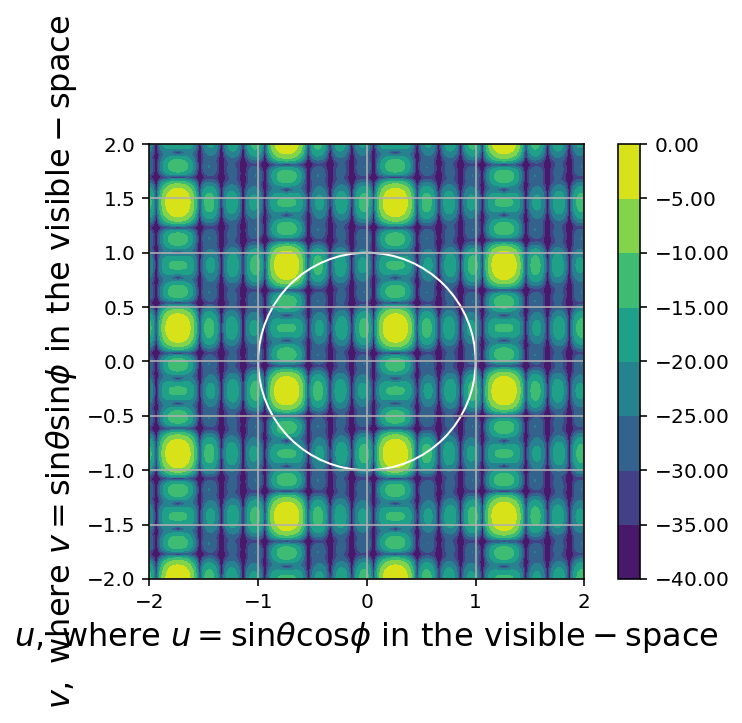

In [46]:
plt.contourf(u, v, F_plt)
vs = plt.Circle((0, 0), radius=1, edgecolor='w', fill=False)
ax = plt.gca()
ax.add_patch(vs)
plt.axis('image')
plt.grid(True)
plt.xlabel(r'$u,\ \mathrm{where}\ u=\sin \theta \cos \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
plt.ylabel(r'$v,\ \mathrm{where}\ v=\sin \theta \sin \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
plt.colorbar(format='$%.2f$')
plt.show()

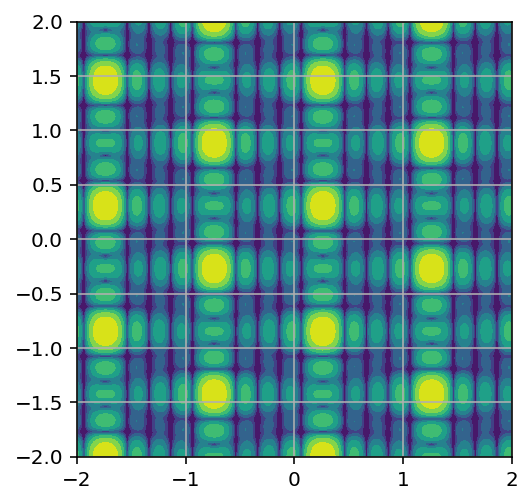

In [50]:
plt.contourf(u, v, F_plt)
#vs = plt.Circle((0, 0), radius=1, edgecolor='w', fill=False)
ax = plt.gca()
#ax.add_patch(vs)
plt.axis('image')
plt.grid(True)
#plt.xlabel(r'$u,\ \mathrm{where}\ u=\sin \theta \cos \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
#plt.ylabel(r'$v,\ \mathrm{where}\ v=\sin \theta \sin \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
#plt.colorbar(format='$%.2f$')
plt.show()

# Old array tool code, works